In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('sonar.csv',names=range(0,61),header=0)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [4]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
206,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [5]:
data.iloc[:10,0:4]

,0,1,2,3
0,0.0453,0.0523,0.0843,0.0689
1,0.0262,0.0582,0.1099,0.1083
2,0.0100,0.0171,0.0623,0.0205
3,0.0762,0.0666,0.0481,0.0394
4,0.0286,0.0453,0.0277,0.0174
5,0.0317,0.0956,0.1321,0.1408
6,0.0519,0.0548,0.0842,0.0319
7,0.0223,0.0375,0.0484,0.0475
8,0.0164,0.0173,0.0347,0.0070
9,0.0039,0.0063,0.0152,0.0336


In [6]:
data.iloc[10:80,:-1]

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
10,0.0123,0.0309,0.0169,0.0313,0.0358,0.0102,0.0182,0.0579,0.1122,0.0835,...,0.0188,0.0133,0.0265,0.0224,0.0074,0.0118,0.0026,0.0092,0.0009,0.0044
11,0.0079,0.0086,0.0055,0.0250,0.0344,0.0546,0.0528,0.0958,0.1009,0.1240,...,0.0174,0.0176,0.0127,0.0088,0.0098,0.0019,0.0059,0.0058,0.0059,0.0032
12,0.0090,0.0062,0.0253,0.0489,0.1197,0.1589,0.1392,0.0987,0.0955,0.1895,...,0.0187,0.0059,0.0095,0.0194,0.0080,0.0152,0.0158,0.0053,0.0189,0.0102
13,0.0124,0.0433,0.0604,0.0449,0.0597,0.0355,0.0531,0.0343,0.1052,0.2120,...,0.0078,0.0083,0.0057,0.0174,0.0188,0.0054,0.0114,0.0196,0.0147,0.0062
14,0.0298,0.0615,0.0650,0.0921,0.1615,0.2294,0.2176,0.2033,0.1459,0.0852,...,0.0154,0.0031,0.0153,0.0071,0.0212,0.0076,0.0152,0.0049,0.0200,0.0073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0239,0.0189,0.0466,0.0440,0.0657,0.0742,0.1380,0.1099,0.1384,0.1376,...,0.0155,0.0091,0.0151,0.0080,0.0018,0.0078,0.0045,0.0026,0.0036,0.0024
76,0.0336,0.0294,0.0476,0.0539,0.0794,0.0804,0.1136,0.1228,0.1235,0.0842,...,0.0033,0.0150,0.0111,0.0032,0.0035,0.0169,0.0137,0.0015,0.0069,0.0051
77,0.0231,0.0351,0.0030,0.0304,0.0339,0.0860,0.1738,0.1351,0.1063,0.0347,...,0.0154,0.0106,0.0097,0.0022,0.0052,0.0072,0.0056,0.0038,0.0043,0.0030
78,0.0108,0.0086,0.0058,0.0460,0.0752,0.0887,0.1015,0.0494,0.0472,0.0393,...,0.0161,0.0029,0.0078,0.0114,0.0083,0.0058,0.0003,0.0023,0.0026,0.0027


In [7]:
df=pd.DataFrame(data=data)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [9]:
df.shape

(207, 61)

In [10]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
0     207 non-null float64
1     207 non-null float64
2     207 non-null float64
3     207 non-null float64
4     207 non-null float64
5     207 non-null float64
6     207 non-null float64
7     207 non-null float64
8     207 non-null float64
9     207 non-null float64
10    207 non-null float64
11    207 non-null float64
12    207 non-null float64
13    207 non-null float64
14    207 non-null float64
15    207 non-null float64
16    207 non-null float64
17    207 non-null float64
18    207 non-null float64
19    207 non-null float64
20    207 non-null float64
21    207 non-null float64
22    207 non-null float64
23    207 non-null float64
24    207 non-null float64
25    207 non-null float64
26    207 non-null float64
27    207 non-null float64
28    207 non-null float64
29    207 non-null float64
30    207 non-null float64
31    207 non-null float64
32    207 non-null float64
33  

In [12]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [13]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

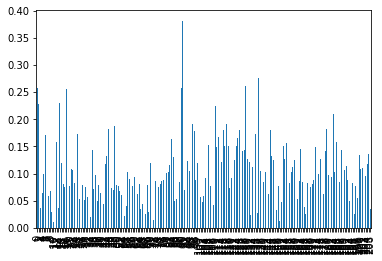

In [14]:
df[5].plot.bar()

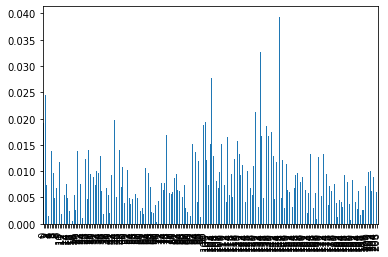

In [15]:
df[55].plot.bar()

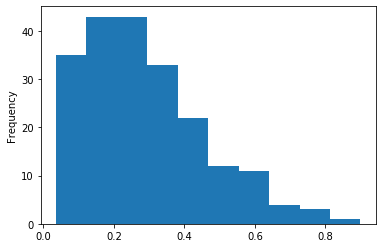

In [16]:
df[40].plot.hist()

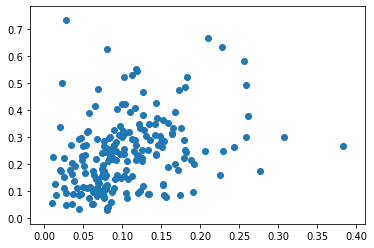

In [17]:
plt.scatter(df[5],df[10])
plt.show()

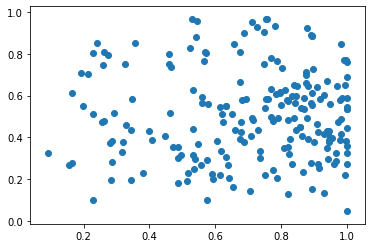

In [18]:
plt.scatter(df[25],df[30])
plt.show()

In [19]:
x=df.iloc[:,0:-1]
x.shape

(207, 60)

In [20]:
pca=PCA(n_components=10)

In [21]:
y=df.iloc[:,-1]

In [22]:
x=pca.fit_transform(x)

In [23]:
x.shape

(207, 10)

In [24]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048
...,...,...,...,...,...,...,...,...,...,...
202,0.049918,-1.028980,0.265634,0.026018,-0.014738,0.097506,0.012021,0.178998,0.029362,-0.268631
203,0.228374,-1.149870,0.200437,0.043461,0.182020,0.010158,0.084858,0.266152,-0.068963,-0.307679
204,0.306763,-1.147756,0.248975,-0.058557,0.161337,0.013778,0.049391,0.227866,-0.070132,-0.313294
205,-0.038083,-0.994049,0.201938,-0.060790,-0.147673,-0.088874,0.018656,0.069504,-0.024406,-0.165303


In [25]:
y

0      R
1      R
2      R
3      R
4      R
      ..
202    M
203    M
204    M
205    M
206    M
Name: 60, Length: 207, dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder              #This is conver the object data i.e. carecter data into numeric value
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scale=StandardScaler()

In [29]:
x=scale.fit_transform(x)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [31]:
lr=LogisticRegression()

In [32]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.7391304347826086

In [33]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg)) 
print(classification_report(y_test,predlg))

0.8043478260869565
[[23  1]
 [ 8 14]]
              precision    recall  f1-score   support

           0       0.74      0.96      0.84        24
           1       0.93      0.64      0.76        22

    accuracy                           0.80        46
   macro avg       0.84      0.80      0.80        46
weighted avg       0.83      0.80      0.80        46



In [34]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt)) 
print(classification_report(y_test,preddt))

0.717391304347826
[[18  6]
 [ 7 15]]
              precision    recall  f1-score   support

           0       0.72      0.75      0.73        24
           1       0.71      0.68      0.70        22

    accuracy                           0.72        46
   macro avg       0.72      0.72      0.72        46
weighted avg       0.72      0.72      0.72        46



In [35]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc)) 
print(classification_report(y_test,predsvc))

0.8913043478260869
[[23  1]
 [ 4 18]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       0.95      0.82      0.88        22

    accuracy                           0.89        46
   macro avg       0.90      0.89      0.89        46
weighted avg       0.90      0.89      0.89        46



In [36]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),GaussianNB()]

In [37]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.8043478260869565
[[23  1]
 [ 8 14]]
              precision    recall  f1-score   support

           0       0.74      0.96      0.84        24
           1       0.93      0.64      0.76        22

    accuracy                           0.80        46
   macro avg       0.84      0.80      0.80        46
weighted avg       0.83      0.80      0.80        46



Accuracy score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples

In [38]:
svc=SVC()
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.46511628 0.75609756 0.51219512 0.75609756 0.3902439 ]
0.5759500850822461
0.15214587755997072


In [57]:
gnb=GaussianNB()
score=cross_val_score(gnb,x,y,cv=5)
print('Score:',score)

print('Mean value:',score.mean())
print('Standard deviation:',score.std())

y_pred=cross_val_predict(gnb,x,y,cv=5)

print('Y prediction value')
print(y_pred)

conf_mat=confusion_matrix(y,y_pred)
conf_mat

Score: [0.41860465 0.70731707 0.43902439 0.73170732 0.3902439 ]
Mean value: 0.5373794668179239
Standard deviation: 0.1497144987398597
Y prediction value
[1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0
 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1]


array([[54, 57],
       [39, 57]], dtype=int64)

In [40]:
svc=SVC()

score=cross_val_score(svc,x,y,cv=5,scoring='accuracy')           # Default value of scoring=accuracy
print('Score:',score)
print('Mean value:',score.mean())
print('Standard deviation:',score.std())

y_pred=cross_val_predict(svc,x,y,cv=5)
print('Y prediction value:')
print(y_pred)

conf_mat=confusion_matrix(y,y_pred)
conf_mat

Score: [0.46511628 0.75609756 0.51219512 0.75609756 0.3902439 ]
Mean value: 0.5759500850822461
Standard deviation: 0.15214587755997072
Y prediction value:
[0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1
 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1]


array([[60, 51],
       [37, 59]], dtype=int64)

In [41]:
#In DecisionTreeClassifier we pass criterion and its value
#gini and entropy
#gini Default value

dtc=DecisionTreeClassifier(criterion='gini')

score=cross_val_score(dtc,x,y,cv=5,scoring='f1')
print('F1-score:',score)
print('Mean value:',score.mean())
print('Standard deviation:',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)

print('Y prediction value:')
print(y_pred)

conf_mat=confusion_matrix(y,y_pred)
conf_mat


F1-score: [0.5106383  0.65116279 0.52380952 0.76923077 0.42424242]
Mean value: 0.5758167611705465
Standard deviation: 0.1208418529404974
Y prediction value:
[1 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0
 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0]


array([[60, 51],
       [37, 59]], dtype=int64)

In [42]:
dtc=DecisionTreeClassifier(criterion='entropy')

score=cross_val_score(dtc,x,y,cv=5,scoring='f1')
print('F1-score:',score)
print('Mean value:',score.mean())
print('Standard deviation:',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)

print('Y prediction value:')
print(y_pred)

conf_mat=confusion_matrix(y,y_pred)
conf_mat


F1-score: [0.42857143 0.75675676 0.52631579 0.71794872 0.64705882]
Mean value: 0.6153303032559998
Standard deviation: 0.12193534411313085
Y prediction value:
[1 0 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0
 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1]


array([[65, 46],
       [36, 60]], dtype=int64)

In [43]:
# In KNeighborsClassifier paramiter we use k value 
#Default k=10
knn=KNeighborsClassifier()
score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print('F1-score:',score)
print('Mean value:',score.mean())
print('Standard deviation:',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)

print('Y prediction value:')
print(y_pred)

conf_mat=confusion_matrix(y,y_pred)
conf_mat


F1-score: [0.39534884 0.58536585 0.51219512 0.70731707 0.34146341]
Mean value: 0.5083380601247872
Standard deviation: 0.131266535977774
Y prediction value:
[0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


array([[65, 46],
       [39, 57]], dtype=int64)

In [44]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    
    score=cross_val_score(svc,x,y,cv=5)
    print('Mean score:',score.mean())
    print('Standard deviation:',score.std())
    y_pred=cross_val_predict(svc,x,y,cv=5)
    conf_mat=confusion_matrix(y,y_pred)
    print(conf_mat)

In [45]:
svmkernel('rbf')

Mean score: 0.5759500850822461
Standard deviation: 0.15214587755997072
[[60 51]
 [37 59]]


In [46]:
svmkernel('poly')

Mean score: 0.6723766307430517
Standard deviation: 0.06396877368073554
[[89 22]
 [46 50]]


In [47]:
from sklearn.model_selection import GridSearchCV

dtc=DecisionTreeClassifier()

para={'criterion':['gini','entropy']}

gr_sr=GridSearchCV(estimator=dtc,param_grid=para,scoring='accuracy',cv=5)

In [48]:
gr_sr.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,


In [49]:
best_parameters=gr_sr.best_params_
print(best_parameters)
best_result=gr_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.7329192546583851


In [50]:
svc=SVC()

parameters={'kernel':['rbf','poly','linear'],'C':[1,10]}

gri_sr=GridSearchCV(svc,parameters)
gri_sr.fit(x_train,y_train)
print(gri_sr.best_params_)

{'C': 10, 'kernel': 'rbf'}


In [51]:
svc=SVC(kernel='rbf',C=10)
svc.fit(x_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [53]:
#svc=SVC(probability=True)
#y_pred_prob=svc.predict_proba(x_test)[:,0]
#y_pred_prob
#tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob

In [54]:
rf=RandomForestClassifier(n_estimators=200,random_state=45)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=45, verbose=0,
                       warm_start=False)

In [56]:
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8478260869565217
[[23  1]
 [ 6 16]]
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        24
           1       0.94      0.73      0.82        22

    accuracy                           0.85        46
   macro avg       0.87      0.84      0.84        46
weighted avg       0.86      0.85      0.85        46



In [58]:
from sklearn.externals import joblib

joblib.dump(svc,'sonarfile.obj')

['sonarfile.obj']